In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import scipy
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve , auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

Importing All the necessary libraries.

# Reading and Understanding the Data

In [2]:
df = pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Here we read the CSV file in jupyter notebook.

Unnamed: column is just the index value , we can drop it.

In [3]:
df = pd.DataFrame(data=df)
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


Here we are loading the dataset into DataFrame. 

In [4]:
df.sample(10)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
17765,2018-01-28,1.29,20073.36,738.01,3026.96,0.00,16298.93,12972.63,3326.30,0.00,organic,2018,Detroit
17803,2018-01-14,1.45,23826.74,175.52,199.52,5.07,23446.63,23446.63,0.00,0.00,organic,2018,HarrisburgScranton
14968,2017-09-17,1.56,31066.35,7.65,1268.05,0.00,29790.65,29698.52,92.13,0.00,organic,2017,Boston
8174,2017-09-24,1.83,144890.83,55004.63,7796.72,126.19,81963.29,58921.39,23031.97,9.93,conventional,2017,StLouis
8750,2018-01-28,1.08,2893717.97,1134192.09,707838.42,81296.65,970390.81,911703.94,16595.96,42090.91,conventional,2018,LosAngeles
11284,2015-06-28,1.55,12946.65,2398.15,10206.13,0.00,342.37,342.37,0.00,0.00,organic,2015,SanDiego
8342,2017-07-23,1.31,32608301.51,11391055.98,11339580.43,612242.37,9265422.73,6333888.33,2636616.32,294918.08,conventional,2017,TotalUS
858,2015-06-28,1.20,243537.29,42688.00,124701.97,2556.60,73590.72,70488.10,2376.23,726.39,conventional,2015,HarrisburgScranton
1252,2015-11-29,0.98,470218.14,349408.27,42435.51,70.13,78304.23,27392.48,50911.75,0.00,conventional,2015,MiamiFtLauderdale
17752,2018-02-04,1.51,16458.72,3746.88,496.84,23.49,12191.51,12101.76,89.75,0.00,organic,2018,Denver


Displaying 10 random samples of data to understand it more

# Data Inspection

In [5]:
df.shape

(18249, 13)

There are 18249 rows and 13 columns in our dataset.

In [6]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

All The columns in the dataset are of only float datatype except Date, Type and Region which are of object datatype. 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


It gives us the Name of columns with its non-null value counts , it's datatype , index number and memory usage.

In [8]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

Here AveragePrice is our target column for Regression Task and Region is our target variable for Classification Problem.

# Data Cleaning

In [9]:
#Checking for Null values
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There are no missing values present in the dataset.

<AxesSubplot:>

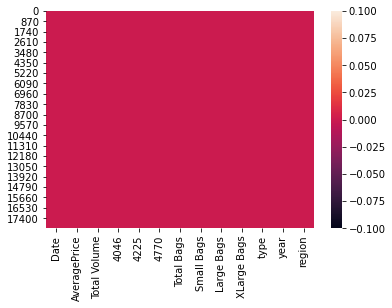

In [10]:
sn.heatmap(df.isnull())

This is the visualization of having absolute no null values in the dataset.

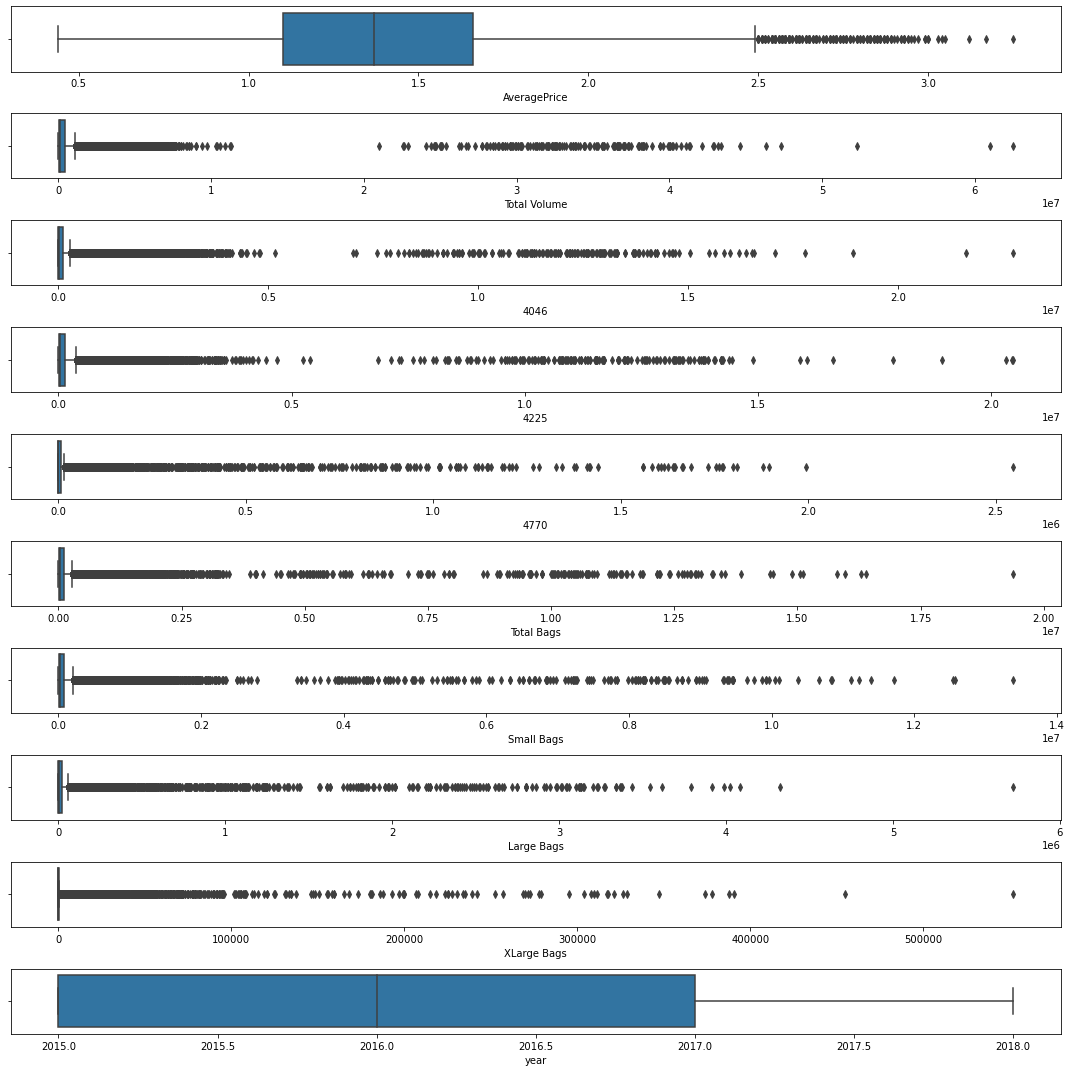

In [11]:
#Outlier Analysis
fig, axs = plt.subplots(10, figsize = (15,15))
plt1 = sn.boxplot(df['AveragePrice'], ax = axs[0])
plt2 = sn.boxplot(df['Total Volume'], ax = axs[1])
plt3 = sn.boxplot(df['4046'], ax = axs[2])
plt4 = sn.boxplot(df['4225'], ax = axs[3])
plt5 = sn.boxplot(df['4770'], ax = axs[4])
plt6 = sn.boxplot(df['Total Bags'], ax = axs[5])
plt7 = sn.boxplot(df['Small Bags'], ax = axs[6])
plt8 = sn.boxplot(df['Large Bags'], ax = axs[7])
plt9 = sn.boxplot(df['XLarge Bags'], ax = axs[8])
plt10 = sn.boxplot(df['year'], ax = axs[9])
plt.tight_layout()

There are so many outliers in all the columns except "Year".

In [12]:
dfzscore=np.abs(zscore(df.drop(['Date','type','region'],axis=1)))
print(np.where(dfzscore>3.5))

(array([  359,   780,   787, ..., 17250, 17303, 17428], dtype=int64), array([2, 8, 4, ..., 0, 0, 0], dtype=int64))


There are so many outliers and we will have to remove them.

In [13]:
dfnew=df[(dfzscore<3.5).all(axis=1)]
df=dfnew
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


We have removed the outliers.

In [14]:
((18249-17829)/18249)*100

2.3014959723820483

After removing the outliers , there is 2.30% data loss, which is under acceptable range.

In [15]:
df.skew()

AveragePrice    0.469352
Total Volume    3.685900
4046            4.774728
4225            4.375679
4770            5.261566
Total Bags      4.098891
Small Bags      4.226473
Large Bags      5.310861
XLarge Bags     6.226759
year            0.223317
dtype: float64

There is a lot of skewness in the dataset.

# Exploratory Data Analysis

# Univariate Analysis

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

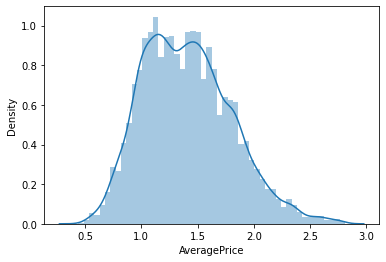

In [16]:
sn.distplot(df['AveragePrice'])

The data of our target column for Regression Problem is very tightly distributed. The data is not normalized but we will treat skewness later.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Albany'),
  Text(1, 0, 'Atlanta'),
  Text(2, 0, 'BaltimoreWashington'),
  Text(3, 0, 'Boise'),
  Text(4, 0, 'Boston'),
  Text(5, 0, 'BuffaloRochester'),
  Text(6, 0, 'California'),
  Text(7, 0, 'Charlotte'),
  Text(8, 0, 'Chicago'),
  Text(9, 0, 'CincinnatiDayton'),
  Text(10, 0, 'Columbus'),
  Text(11, 0, 'DallasFtWorth'),
  Text(12, 0, 'Denver'),
  Text(13, 0, 'Detroit'),
  Text(14, 0, 'GrandRapids'),
  Text(15, 0, 'GreatLakes'),
  Text(16, 0, 'HarrisburgScranton'),
  Text(17, 0, 'HartfordSpringfield'),
  Text(18, 0, 'Houston'),
  Text(19, 0, 'Indianapolis'),
  Text(20, 0, 'Jacksonville'),
  Text(21, 0, 'LasVegas'),
  Text(22, 0, 'LosAngeles'),
  Text(23, 0, 'Louisville'),
  Text(24, 0, 'MiamiFtLauderdale'),
  Text(25, 0, 'M

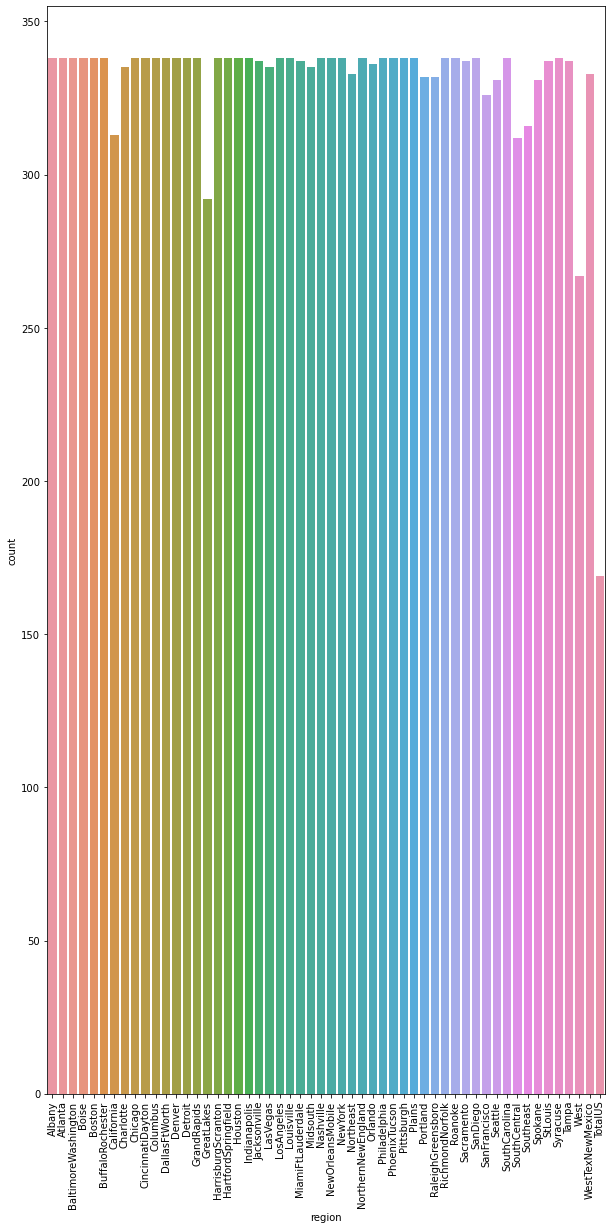

In [17]:
plt.figure(figsize=(10,20))
sn.countplot(df['region'])
plt.xticks(rotation=90)

The "region" is our target variable for classification problem . Here exists some class imbalance.

<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

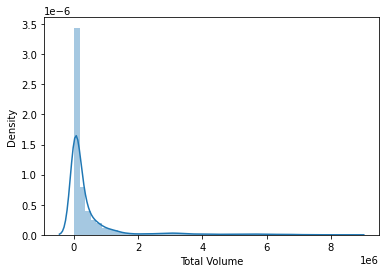

In [18]:
sn.distplot(df['Total Volume'])

This dataset is normalized and it does not have skewness.

<AxesSubplot:xlabel='4046', ylabel='Density'>

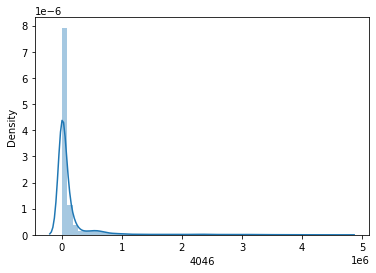

In [19]:
sn.distplot(df['4046'])

This data is almost normalized. It does not have skewness

<AxesSubplot:xlabel='4225', ylabel='Density'>

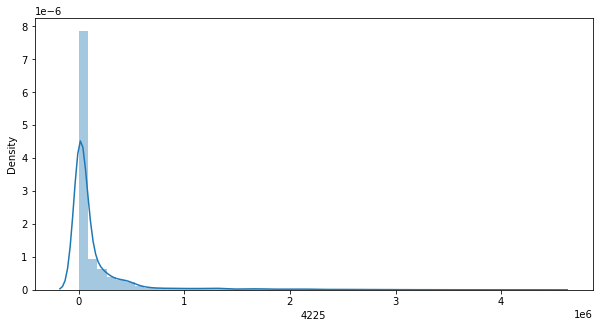

In [20]:
plt.figure(figsize=(10,5))
sn.distplot(df['4225'])

This is also almost normalized data.

<AxesSubplot:xlabel='4770', ylabel='Density'>

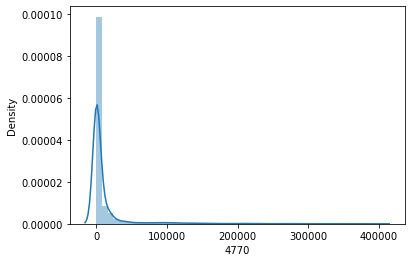

In [21]:
sn.distplot(df['4770'])

This is normalized data. No skewness.

<AxesSubplot:xlabel='Total Bags', ylabel='Density'>

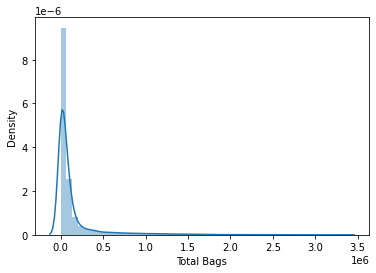

In [22]:
sn.distplot(df['Total Bags'])

This column has very normalized data 

<AxesSubplot:xlabel='Small Bags', ylabel='Density'>

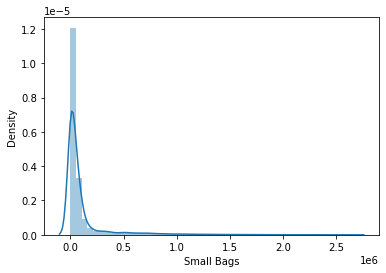

In [23]:
sn.distplot(df['Small Bags'])

This column has very normalized data

<AxesSubplot:xlabel='Large Bags', ylabel='Density'>

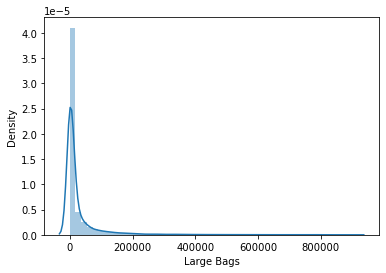

In [24]:
sn.distplot(df['Large Bags'])

This column has almost normalized data

<AxesSubplot:xlabel='XLarge Bags', ylabel='Density'>

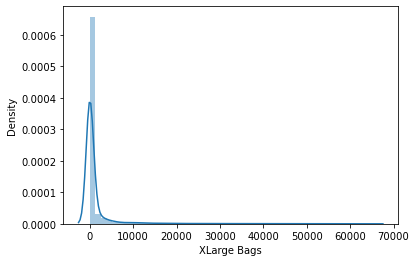

In [25]:
sn.distplot(df['XLarge Bags'])

This column has very normalized data

<AxesSubplot:xlabel='year', ylabel='Density'>

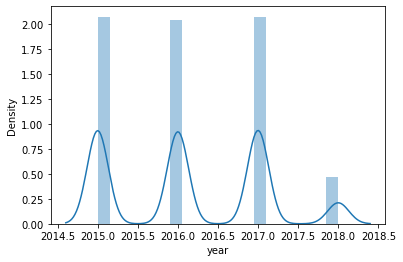

In [26]:
sn.distplot(df['year'])

This is not normalized data.

<AxesSubplot:xlabel='type', ylabel='Count'>

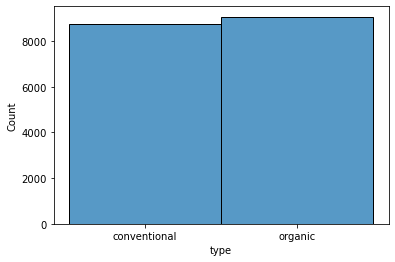

In [27]:
sn.histplot(df['type'])

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
 

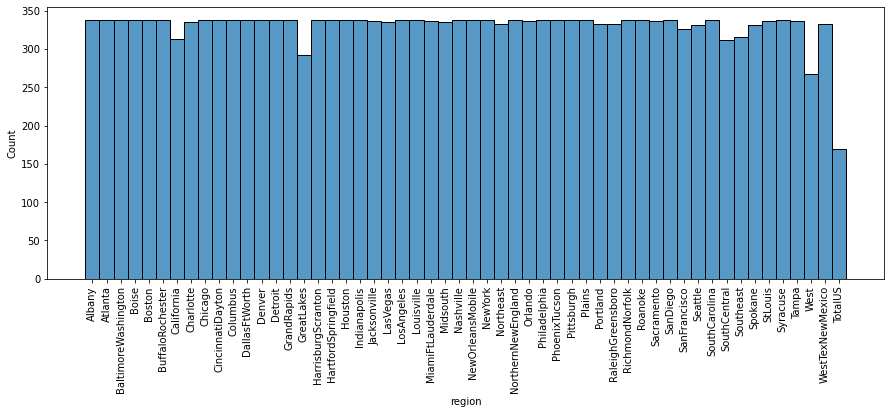

In [28]:
plt.figure(figsize=(15,5))
sn.histplot(df['region'])
plt.xticks(rotation=90)

Avocado from region 'TotalUS' are least in number .

# Bivariate Analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Albany'),
  Text(1, 0, 'Atlanta'),
  Text(2, 0, 'BaltimoreWashington'),
  Text(3, 0, 'Boise'),
  Text(4, 0, 'Boston'),
  Text(5, 0, 'BuffaloRochester'),
  Text(6, 0, 'California'),
  Text(7, 0, 'Charlotte'),
  Text(8, 0, 'Chicago'),
  Text(9, 0, 'CincinnatiDayton'),
  Text(10, 0, 'Columbus'),
  Text(11, 0, 'DallasFtWorth'),
  Text(12, 0, 'Denver'),
  Text(13, 0, 'Detroit'),
  Text(14, 0, 'GrandRapids'),
  Text(15, 0, 'GreatLakes'),
  Text(16, 0, 'HarrisburgScranton'),
  Text(17, 0, 'HartfordSpringfield'),
  Text(18, 0, 'Houston'),
  Text(19, 0, 'Indianapolis'),
  Text(20, 0, 'Jacksonville'),
  Text(21, 0, 'LasVegas'),
  Text(22, 0, 'LosAngeles'),
  Text(23, 0, 'Louisville'),
  Text(24, 0, 'MiamiFtLauderdale'),
  Text(25, 0, 'M

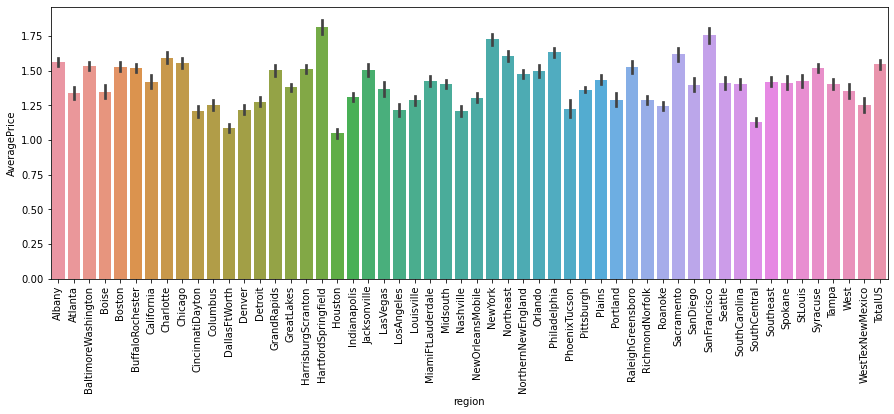

In [29]:
plt.figure(figsize=(15,5))
sn.barplot(y=df['AveragePrice'], x=df['region'])
plt.xticks(rotation=90)

The avocados from region 'HartfordSpringfield' and 'SanFrancisco' have the maximum average price.

<Figure size 1440x2880 with 0 Axes>

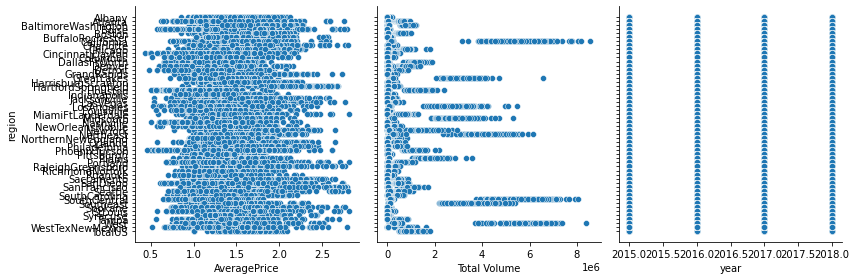

In [30]:
plt.figure(figsize=(20,40))
sn.pairplot(df, x_vars=['AveragePrice', 'Total Volume', 'year'], y_vars='region', height=4, aspect=1, kind='scatter')
plt.tight_layout()

The average price is very well distributed against region.

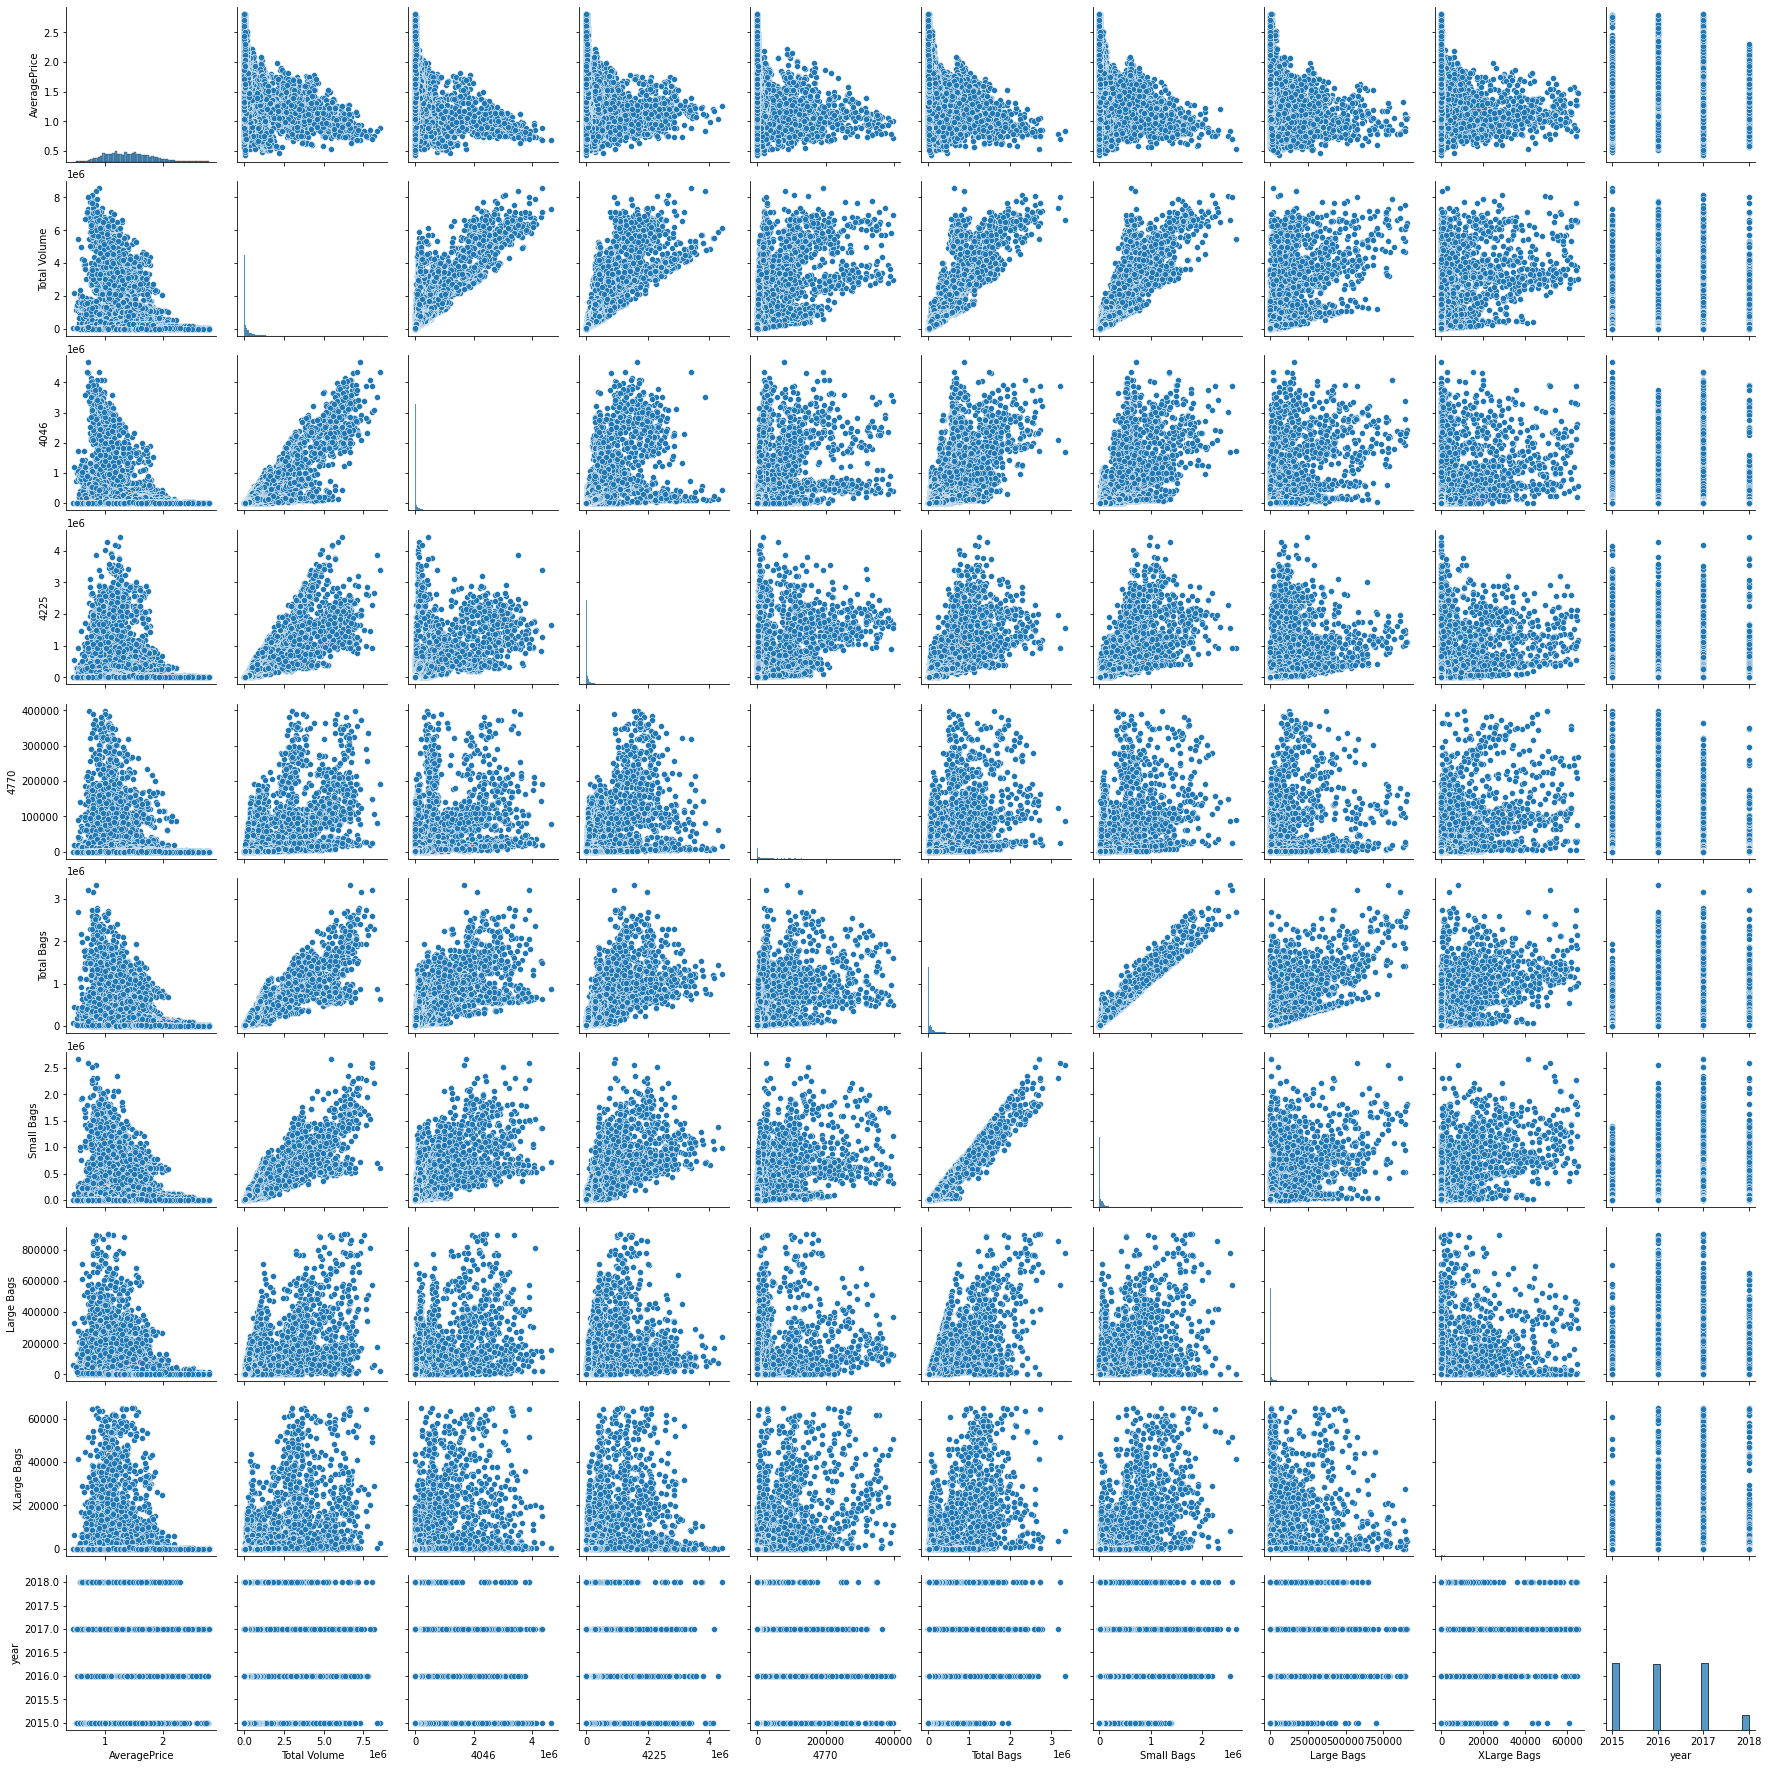

In [31]:
sn.pairplot(df)

Pairplot gives the graph of each column with every another column and itself as well.

# Multivariate Analysis

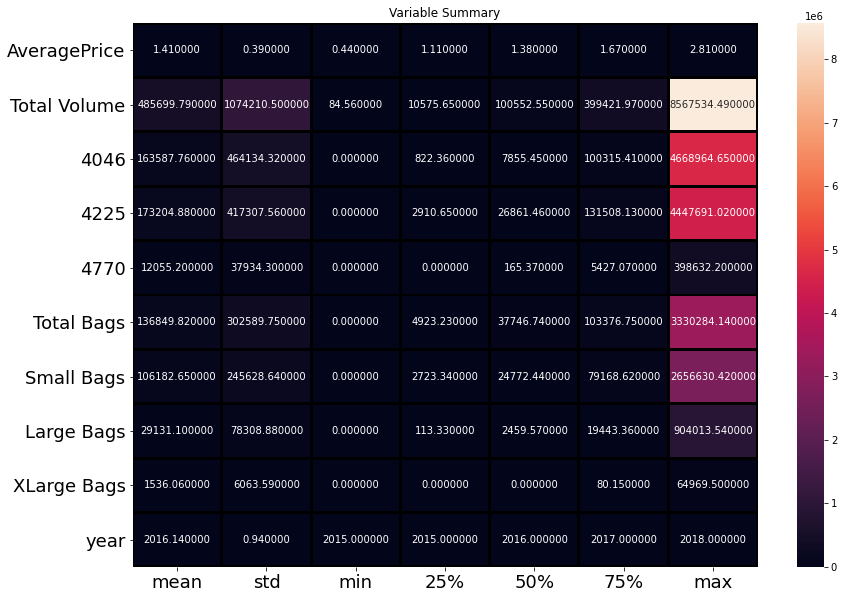

In [32]:
plt.figure(figsize=(14,10))
sn.heatmap(round(df.describe()[1:].transpose(),2),lw=2,linecolor='black',annot=True,fmt='f',color='red')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Variable Summary')
plt.show()

It gives us the mean , median , mode , minimum, maximum of all the numeric columns.

In [33]:
le = LabelEncoder()
dflist=['Date','type','region']
#dflist = dflist.astype('category')
for column in dflist:
    df[column]=le.fit_transform(df[column])
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,50,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,49,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,48,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,47,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,161,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,160,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,159,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,158,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


Label Encoding the columns of object datatype.

<AxesSubplot:>

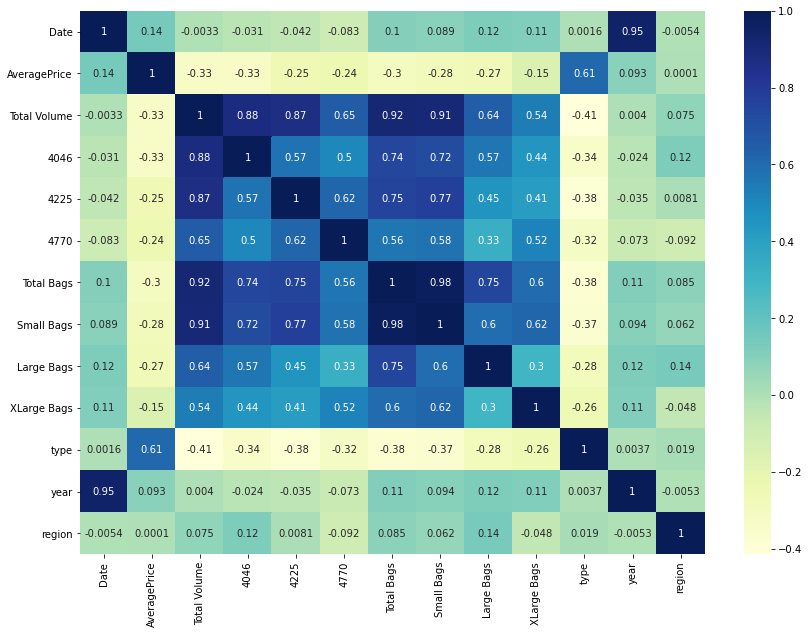

In [34]:
plt.figure(figsize=(14,10))
sn.heatmap(df.corr(), cmap="YlGnBu", annot = True)

Total Volume , Total Bags and Small bags; Date And Year have multi-colinearity. We will have to drop 3 columns to reduce the multi-colinearity.

In [35]:
df.drop(['Total Bags','Small Bags','Date'],axis=1,inplace=True)

We have dropped Total bags and samll bags as they are not contributing much to target predicted. we studied this through EDA

In [36]:
x1=df.drop(['AveragePrice'],axis=1)
y1=df['AveragePrice']

We have stored the feature variables for regression in x1 and target in y1.

# Removing Skewness

In [37]:
from sklearn.preprocessing import power_transform
x1=power_transform(x1,method='yeo-johnson')
x1

array([[-0.5733729 , -0.07693201, -0.6572647 , ..., -1.01759832,
        -1.21481175, -2.01066059],
       [-0.59564349, -0.14856095, -0.77670036, ..., -1.01759832,
        -1.21481175, -2.01066059],
       [-0.61804166,  0.20140577, -0.73140826, ..., -1.01759832,
        -1.21481175, -2.01066059],
       ...,
       [ 1.4110568 , -0.77349408, -0.61793881, ...,  0.98270603,
         1.97595526,  1.57529416],
       [ 1.39503479, -0.70017342, -0.5472412 , ...,  0.98270603,
         1.97595526,  1.57529416],
       [ 1.37898341, -0.66584633, -0.36074731, ...,  0.98270603,
         1.97595526,  1.57529416]])

We have treated skewness using Power Transformation.

In [38]:
scale = StandardScaler()
x1=scale.fit_transform(x1)
x1

array([[-0.5733729 , -0.07693201, -0.6572647 , ..., -1.01759832,
        -1.21472649, -2.01066059],
       [-0.59564349, -0.14856095, -0.77670036, ..., -1.01759832,
        -1.21472649, -2.01066059],
       [-0.61804166,  0.20140577, -0.73140826, ..., -1.01759832,
        -1.21472649, -2.01066059],
       ...,
       [ 1.4110568 , -0.77349408, -0.61793881, ...,  0.98270603,
         1.97604054,  1.57529416],
       [ 1.39503479, -0.70017342, -0.5472412 , ...,  0.98270603,
         1.97604054,  1.57529416],
       [ 1.37898341, -0.66584633, -0.36074731, ...,  0.98270603,
         1.97604054,  1.57529416]])

We have standarized the input/feature variables.

# Model Building For Regression

In [39]:
xtrain, xtest, ytrain, ytest = train_test_split(x1, y1, test_size = 0.3, random_state = 45)
lr= LinearRegression()
lr.fit(xtrain,ytrain)
lr.coef_
pred_train=lr.predict(xtrain)
pred_test=lr.predict(xtest)
print("Predicted Values",pred_test)
print(r2_score(ytest,pred_test))

Predicted Values [1.84064183 1.7166675  1.1049985  ... 1.05727043 1.82443107 1.58197781]
0.5440233890445213


The r2_score for LinearRegression is 54.40%

In [40]:
dtr=DecisionTreeRegressor(criterion='mse')
dtr.fit(xtrain,ytrain)
print('DTC Score:',dtr.score(xtrain,ytrain))

dtrpredict=dtr.predict(xtest)
print('DTC r2_score:',r2_score(ytest,dtrpredict))

print("Mean squared error of DTC:",mean_squared_error(ytest,dtrpredict))
print("Root Mean Square error of DTC:",np.sqrt(mean_squared_error(ytest,dtrpredict)))

DTC Score: 1.0
DTC r2_score: 0.7752516496837637
Mean squared error of DTC: 0.03593310899233502
Root Mean Square error of DTC: 0.18956030436864946


The r2_score of DecisionTree Regressor is 77.52%.

In [41]:
knr = KNeighborsRegressor()
knr.fit(xtrain,ytrain)
print('SCORE:',knr.score(xtrain,ytrain))
knrpredict=knr.predict(xtest)
print("r2_score:",r2_score(ytest,knrpredict))
print("Mean Square Error:",mean_squared_error(ytest,knrpredict))
print("Root Mean Square:",np.sqrt(mean_squared_error(ytest,knrpredict)))

SCORE: 0.9057876919493486
r2_score: 0.8541981001404912
Mean Square Error: 0.02331103009908394
Root Mean Square: 0.15267950124061822


The r2_score of KneighborsRefressor is 85.41%

In [42]:
svr = SVR()
svr.fit(xtrain,ytrain)
print('Score:',svr.score(xtrain,ytrain))
svrpredict=svr.predict(xtest)
print('r2_Score:',r2_score(ytest,svrpredict))
print("Mean Squared Error Of DTC:",mean_squared_error(ytest,svrpredict))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(ytest,svrpredict)))

Score: 0.7608150700957611
r2_Score: 0.7558106196170619
Mean Squared Error Of DTC: 0.03904137052718995
Root Mean Squared Error: 0.19758889272221236


The r2_score of SVR is 75.58%

In [43]:
sgd=SGDRegressor()
sgd.fit(xtrain,ytrain)
print('SGD SCORE:',sgd.score(xtrain,ytrain))
sgdpredict=sgd.predict(xtest)
print('SGD r2_score:',r2_score(ytest,sgdpredict))
print('Mean squared Error:',mean_squared_error(ytest,sgdpredict))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(ytest,sgdpredict)))

SGD SCORE: 0.5294594241901487
SGD r2_score: 0.5420443763557824
Mean squared Error: 0.07321864349574106
Root Mean Squared Error: 0.27058943714738953


The r2_score of SGD Regressor is 54.31%

# Cross value Score for Regression Models

In [44]:
print(cvs(lr,x1,y1,cv=5).mean())
print(cvs(dtr,x1,y1,cv=5).mean())
print(cvs(knr,x1,y1,cv=5).mean())
print(cvs(svr,x1,y1,cv=5).mean())
print(cvs(sgd,x1,y1,cv=5).mean())

0.15031749960397628
-0.02949375697871557
0.18437086519386986
0.2132754664000557
0.1463558316277427


The minimum difference between r2_score and cv score is of KNeighborsRegressor

# Hyper Parameter Tuning for KNeighborRegressor

In [45]:
parameter = {'n_neighbors':[1,2,3,4,5],
            'weights':['uniform', 'distance'],
            'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
            'leaf_size':np.arange(10,100,10)}
gvc = GridSearchCV(knr,parameter,cv=5)
gvc.fit(xtrain,ytrain)
gvc.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 3, 'weights': 'distance'}

Getting all the best parameter to apply in our model

In [46]:
AvocadoAP_model = KNeighborsRegressor(n_neighbors=3,weights='distance',algorithm='auto',leaf_size=10)
AvocadoAP_model.fit(xtrain,ytrain)
pred=AvocadoAP_model.predict(xtest)
accuracy=r2_score(ytest,pred)
print(accuracy*100)

88.23037530442058


We have applied the best Parameters and got 88.23% accuracy.

# Model Saving for Regression Problem

In [47]:
import pickle
filename = 'Avocado_Regression.pkl'
pickle.dump(AvocadoAP_model,open(filename,'wb'))

Saving the best model

# Conclusion

In [48]:
a= np.array(ytest)
predicted = np.array(AvocadoAP_model.predict(xtest))
AvocadoAP=pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
AvocadoAP

,Original,Predicted
0,2.04,1.765982
1,1.38,1.522785
2,0.91,0.994931
3,1.52,1.355695
4,1.37,1.393482
...,...,...
5344,1.01,1.144961
5345,1.21,1.164188
5346,1.31,1.257864
5347,2.25,2.242307


The predicted average rate is nearby to the original average rate. Hence we can say that our model is working fine.

# Model Building For Classification

In [49]:
x2=df.drop(['region'],axis=1)
y2=df['region']

We have stored the feature variables for Classification in x2 and target in y2

In [50]:
from sklearn.preprocessing import power_transform
x2=power_transform(x2,method='yeo-johnson')
x2

array([[-0.5733729 , -0.11131174, -0.07693201, ..., -0.68130745,
        -1.01759832, -1.21481175],
       [-0.59564349, -0.058508  , -0.14856095, ..., -0.68130745,
        -1.01759832, -1.21481175],
       [-0.61804166, -1.29322581,  0.20140577, ..., -0.68130745,
        -1.01759832, -1.21481175],
       ...,
       [ 1.4110568 ,  1.1563197 , -0.77349408, ..., -0.68130745,
         0.98270603,  1.97595526],
       [ 1.39503479,  1.27988203, -0.70017342, ..., -0.68130745,
         0.98270603,  1.97595526],
       [ 1.37898341,  0.6072106 , -0.66584633, ..., -0.68130745,
         0.98270603,  1.97595526]])

Removing skewness from feature variables of Classification problem.

In [51]:
scale = StandardScaler()
x2=scale.fit_transform(x2)
x2

array([[-0.5733729 , -0.11131174, -0.07693201, ..., -0.68130745,
        -1.01759832, -1.21472649],
       [-0.59564349, -0.058508  , -0.14856095, ..., -0.68130745,
        -1.01759832, -1.21472649],
       [-0.61804166, -1.29322581,  0.20140577, ..., -0.68130745,
        -1.01759832, -1.21472649],
       ...,
       [ 1.4110568 ,  1.1563197 , -0.77349408, ..., -0.68130745,
         0.98270603,  1.97604054],
       [ 1.39503479,  1.27988203, -0.70017342, ..., -0.68130745,
         0.98270603,  1.97604054],
       [ 1.37898341,  0.6072106 , -0.66584633, ..., -0.68130745,
         0.98270603,  1.97604054]])

We have standarized the input/feature variables.

# Over Sampling

In [52]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x,y = smt.fit_resample(x2,y2)
y

0         0
1         0
2         0
3         0
4         0
         ..
18247    53
18248    53
18249    53
18250    53
18251    53
Name: region, Length: 18252, dtype: int32

Over_sampling the data to remove Class Imbalance.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(34, 0, '34'),
  Text(35, 0, '35'),
  Text(36, 0, 

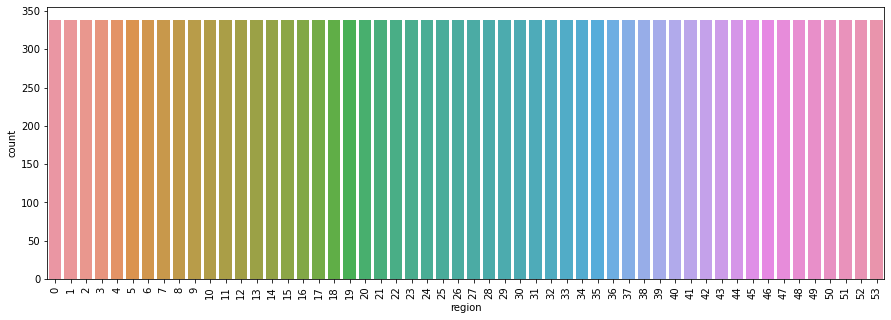

In [53]:
plt.figure(figsize=(15,5))
sn.countplot(y)
plt.xticks(rotation=90)

Now there exist no class imbalance.

# Model Building For Classification

In [54]:
dt = DecisionTreeClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=45)
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
preddt=dt.predict(x_test)

lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_train_lr=lr.predict(x_train)
pred_test_lr=lr.predict(x_test)

rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf=rf.predict(x_test)

kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(x_train,y_train)
kn.score(x_train,y_train)
predkn=kn.predict(x_test)

sv = SVC()
sv.fit(x_train,y_train)
sv.score(x_train,y_train)
predsv=sv.predict(x_test)

print("Accuracy of Decision Tree Classifier = ",accuracy_score(y_test,preddt)*100,"%")
print("Accuracy of Logistic Regression = ",accuracy_score(y_test,pred_test_lr)*100,"%")
print("Accuracy of Random Forest Classifier =",accuracy_score(y_test,predrf)*100,"%")
print("Accuracy of K-Neighbor Classifier =",accuracy_score(y_test,predkn)*100,"%")
print("Accuracy of Support Vector Machine Classifier = ",accuracy_score(y_test,predsv)*100,"%")

Accuracy of Decision Tree Classifier =  78.1227173119065 %
Accuracy of Logistic Regression =  48.50255661066472 %
Accuracy of Random Forest Classifier = 89.29875821767713 %
Accuracy of K-Neighbor Classifier = 80.86194302410519 %
Accuracy of Support Vector Machine Classifier =  76.09569028487947 %


We have printed accuracy of all the models together.

# Cross Validation Score for Classification Task

In [55]:
print("CVS for DecisionTree Classifier =",cvs(dt,x,y,cv=5).mean()*100,"%")
print("CVS for Logistic Regression =",cvs(lr,x,y,cv=3).mean()*100,"%")
print("CVS for Random Forest Classifier =",cvs(rf,x,y,cv=5).mean()*100,"%")
print("CVS for K-Neighbor Classifier =",cvs(kn,x,y,cv=5).mean()*100,"%")
print("CVS for Support Vector Machine Classifier =",cvs(sv,x,y,cv=3).mean()*100,"%")

CVS for DecisionTree Classifier = 55.204589472578355 %
CVS for Logistic Regression = 29.021477098400172 %
CVS for Random Forest Classifier = 69.46040079092612 %
CVS for K-Neighbor Classifier = 49.49564727997209 %
CVS for Support Vector Machine Classifier = 43.5568704799474 %


The least difference between accuracy score and cross validation score is of "Random Forest Classifier" and hence we will choose Random forest classifier.

# Hyper Parameter Tuning for Classification

In [58]:
parameter={'n_estimators':np.arange(50,350,50),
          'criterion':['gini','entropy'],
          'max_features':['auto','sqrt','log2'],
          'class_weight':['balanced', 'balanced_subsample']}
gvc = GridSearchCV(RandomForestClassifier(),parameter,cv=5)
gvc.fit(x_train,y_train)
gvc.best_params_

Avocado = RandomForestClassifier(criterion='entropy',n_estimators=150,max_features='sqrt',class_weight='balanced_subsample')
Avocado.fit(x_train,y_train)
pred=Avocado.predict(x_test)
acc=accuracy_score(y_test,pred)
print("Accuracy of Random Forest Classifier of Final Avocado Classification Model:",acc*100,"%")

Accuracy of Random Forest Classifier of Final Avocado Classification Model: 89.62746530314098 %


{'class_weight': 'balanced_subsample',
 'criterion': 'entropy',
 'max_features': 'sqrt',
 'n_estimators': 150}

We get the best parameters to be used in RandomForestClassifier() to increase it's accuracy.

Our Final Model has 89.62% accuracy which is good.

(P.S. I have run two codes in the same cell by mistake , and it takes hours to fetch the best parameter , I am not doing it again , instead just mentioning my output of best parameters in the comment. Kindly accept.And If you want to see this code as a separate code, kindly refer the file "Avocado Project New" in the same repository as this project.)

# AUC-ROC CURVE

Can't Build a Auc-Roc Curve with MultiClass.

# Model Saving

In [60]:
import pickle
filename = 'AvocadoClassification.pkl'
pickle.dump(Avocado,open(filename,'wb'))

We have saved our final model .

# Conclusion

In [61]:
a= np.array(y_test)
predicted = np.array(Avocado.predict(x_test))
Avocado=pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
Avocado

,Original,Predicted
0,38,38
1,17,3
2,28,28
3,1,48
4,46,46
...,...,...
5471,36,36
5472,16,16
5473,0,49
5474,26,26


Most of the data have been predicted correctly. Hence our model is working Fine.